<h2 align="center" style="color:purple">Phase 1: AtliQ0 Bank Credit Card Project</h2>

<h4 style="color:blue;">In the Phase 1 of the project, find Target Market</h4>

**Business Problem**  
Objective:
AtliQo Bank plans to launch a new credit card and needs to identify the most suitable customer segment based on transaction patterns and credit profiles.

Goal:
Use customer, transaction, and credit profile data to identify a high-potential target group for a pilot credit card campaign.

In [5]:
#!pip install mysql-connector-python sqlalchemy pandas

In [6]:
#!pip show mysql-connector-python

In [7]:
# import required libraries

import sqlalchemy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import statsmodels.stats.api as sms
import statsmodels.api as sm
import os
import warnings
warnings.filterwarnings("ignore")

import mysql.connector
from sqlalchemy import create_engine
from dotenv import load_dotenv

#check the versions

print("SQLAlchemy version:", sqlalchemy.__version__)
print("Pandas version:", pd.__version__)

SQLAlchemy version: 2.0.41
Pandas version: 2.3.0


In [8]:
#!pip install --upgrade pandas

In [9]:
#pip install python-dotenv

<h4 style="color:blue;">Read the data from the database</h4>

In [11]:
# load the env file. 
load_dotenv(dotenv_path='config.env')

# Read the credentials from .env file. 
user = os.getenv("MYSQL_USER")
password = os.getenv("MYSQL_PASSWORD")
host = os.getenv("MYSQL_HOST")
port = os.getenv("MYSQL_PORT")
database = os.getenv("MYSQL_DATABASE")

# Create SQLAlchemy engine
engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}")

# query to get the customer tabel data.
df_customer = pd.read_sql("SELECT * FROM customers", con=engine)

# Preview the result. Display the first 5 rows of the customer dataset. 

df_customer.head()


,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563,Married
4,5,Advait Malik,Male,48,City,Consultant,39406,Married


In [12]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   cust_id         1000 non-null   int64 
 1   name            1000 non-null   object
 2   gender          1000 non-null   object
 3   age             1000 non-null   int64 
 4   location        1000 non-null   object
 5   occupation      1000 non-null   object
 6   annual_income   1000 non-null   int64 
 7   marital_status  1000 non-null   object
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
# query to get the transactions tabel data.
df_transactions = pd.read_sql("SELECT * FROM transactions", con=engine)

# Preview
df_transactions.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [14]:
# query to get the credit score tabel data.
df_cp = pd.read_sql("SELECT * FROM credit_profiles", con=engine)

# Preview
df_cp.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


<h4 style="color:blue;">Explaore the Customer Table</h4>

In [16]:
# get the column names from customer table. 

df_customer.columns

Index(['cust_id', 'name', 'gender', 'age', 'location', 'occupation',
       'annual_income', 'marital_status'],
      dtype='object')

#### Dataset Information:

- **cust_id**: A unique identifier assigned to each customer  
- **name**: Full name of the customer  
- **gender**: Gender identity of the customer (`Male` or `Female`)  
- **age**: Age of the customer, expressed in completed years  
- **location**: Geographic location where the customer resides (categorized as `City` or `Rural`)  
- **occupation**: Primary profession or employment type (e.g., Business Owner, Consultant, Freelancer)  
- **annual_income**: Reported yearly income of the customer (in standard currency units)  
- **marital_status**: Current marital status (`Married` or `Single`)  


In [18]:
#get the stats of the customer dataset
df_customer.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,132439.799000
std,288.819436,15.666155,113706.313793
min,1.000000,1.000000,0.000000
25%,250.750000,26.000000,42229.750000
50%,500.500000,32.000000,107275.000000
75%,750.250000,46.000000,189687.500000
max,1000.000000,135.000000,449346.000000


In [19]:
# Check if any null values in the dataset.

df_customer.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [20]:
#check the data types of each column. 

df_customer.dtypes

cust_id            int64
name              object
gender            object
age                int64
location          object
occupation        object
annual_income      int64
marital_status    object
dtype: object

In [21]:
# Filter and display rows where the 'annual_income' column has missing (NaN) values
df_customer[df_customer.annual_income.isna()]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [22]:
# check if annual income column contain any 0 value. If zero replace that with the median value of the respective occupation.
df_customer[df_customer['annual_income'] == 0]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,0,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,0,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,0,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,0,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,0,Married
170,171,Advait Verma,Male,52,City,Business Owner,0,Single
186,187,Samar Sardar,Male,53,City,Consultant,0,Single
192,193,Ishan Joshi,Male,37,Suburb,Data Scientist,0,Married
227,228,Advait Mukherjee,Male,48,City,Business Owner,0,Married
232,233,Aditya Goel,Male,26,City,Freelancer,0,Married


In [23]:
# Step 1: Calculate median income per occupation

median_income_by_occ = df_customer[df_customer['annual_income'] > 0].groupby('occupation')['annual_income'].median()

# Step 2: Define a function to impute zero incomes with the median income of the corresponding occupation
def impute_income(row):
    if row['annual_income'] == 0:
        return median_income_by_occ.get(row['occupation'], 0)  # fallback to 0 if occupation is missing
    else:
        return row['annual_income']

# Step 3: Apply the imputation function to each row in the DataFrame
df_customer['annual_income'] = df_customer.apply(impute_income, axis=1)


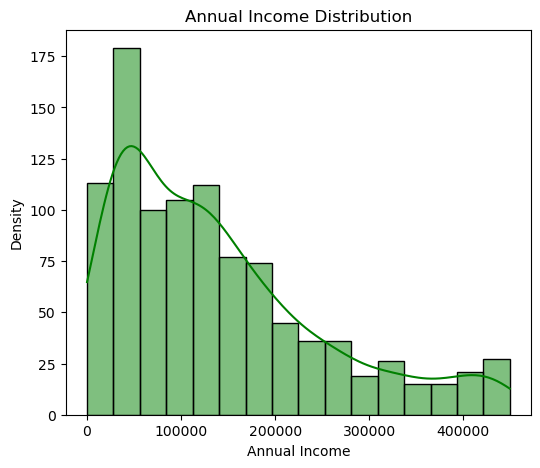

In [24]:
# Plot the distribution of 'annual_income' with a histogram and KDE (kernel density estimate)

plt.figure(figsize=(6, 5))
sns.histplot(df_customer['annual_income'], kde=True, color='green', label='Data')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Density')
plt.show()


**Insight**  
The distribution of annual income is right-skewed, indicating that most customers have lower income levels, while a smaller group earns significantly more.

In [26]:
# Display summary statistics (count, mean, std, min, quartiles, max) for all numeric columns in the dataset
df_customer.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


In [27]:
# Filter and display customer records where the annual income is less than 100 (potential outliers or invalid entries)

df_customer[df_customer.annual_income<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [28]:
# median income per occupation store in this variable from the above steps. 
median_income_by_occ

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [29]:
#replacing the annual_income value < 100 with the median income of that customers occupation. 

for index, row in df_customer.iterrows():
    if row["annual_income"]<100:
        df_customer.at[index, "annual_income"] = median_income_by_occ[row["occupation"]]

In [30]:
# again check for confirmation after replacing the values. 
df_customer[df_customer.annual_income<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [31]:
#cross checking with random values

df_customer.loc[[31,316]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,261191.5,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,58017.0,Married


In [32]:
#data visulization: annual income. Exploring average income level based on occupation, gender, location and marital status

avg_income_per_occupation = df_customer[df_customer['annual_income'] > 0].groupby('occupation')['annual_income'].mean()
avg_income_per_occupation

occupation
Accountant              64123.562500
Artist                  45309.236842
Business Owner         268447.368512
Consultant              60703.154639
Data Scientist         137021.266304
Freelancer              76327.508772
Fullstack Developer     78727.972973
Name: annual_income, dtype: float64

In [33]:
avg_income_per_occupation.index

Index(['Accountant', 'Artist', 'Business Owner', 'Consultant',
       'Data Scientist', 'Freelancer', 'Fullstack Developer'],
      dtype='object', name='occupation')

In [34]:
avg_income_per_occupation.values

array([ 64123.5625    ,  45309.23684211, 268447.36851211,  60703.15463918,
       137021.26630435,  76327.50877193,  78727.97297297])

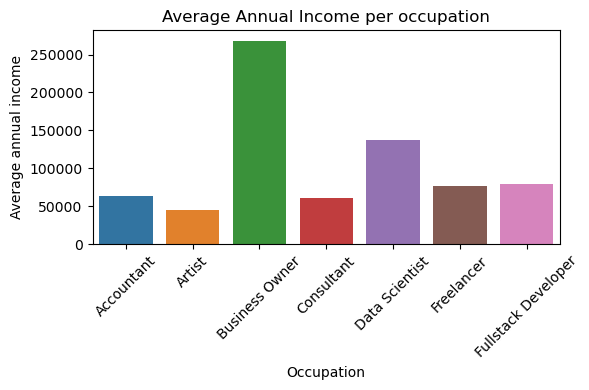

In [35]:
#plot how average income varies across different occupations

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_income_per_occupation.index, y=avg_income_per_occupation.values, palette="tab10")
plt.xticks(rotation=45)
plt.title('Average Annual Income per occupation')
plt.xlabel('Occupation')
plt.ylabel('Average annual income')
plt.tight_layout()
plt.show()

#### Insights:
- Business owners earn significantly more than individuals in other occupations, underscoring their dominant financial standing within the customer base.
- Data scientists also report a high average income, likely reflecting the growing market demand and specialized skillset associated with the role.
- Occupations such as fullstack developers, freelancers, consultants, and accountants fall in the middle income range, while artists represent the lowest average earners in the dataset.

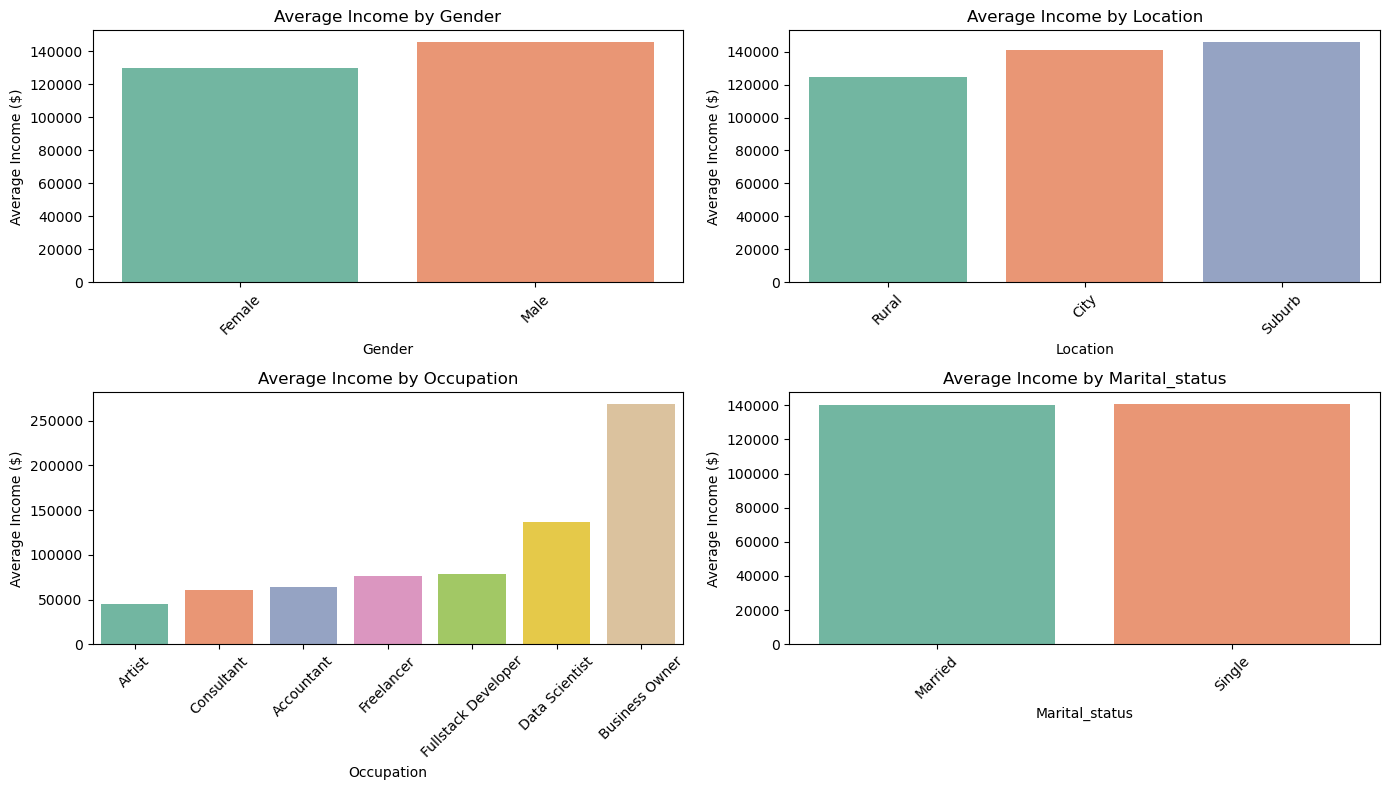

In [37]:
# Create a bar plots to visualize average annual income across each categorical variable (gender, location, occupation, marital status)

categorical_columns = ['gender', 'location', 'occupation', 'marital_status']
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    ax = axes[i]
    avg_income_per_group = df_customer.groupby(col)['annual_income'].mean().sort_values()

    sns.barplot(
        x=avg_income_per_group.index,
        y=avg_income_per_group.values,
        hue=avg_income_per_group.index,
        palette='Set2',
        legend=False,
        ax=ax
    )

    ax.set_title(f'Average Income by {col.capitalize()}')
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel('Average Income ($)')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


#### Insights from Categorical Analysis of Average Annual Income
- Gender: 
Males have a slightly higher average income than females.

- Location: 
Customers living in city and suburban areas earn noticeably more than those in rural regions.

- Occupation:
Business Owners lead significantly in average income, followed by Data Scientists.  
Occupations such as fullstack developers, freelancers, consultants, and accountants fall in the middle income range, while artists represent the lowest average earners in the dataset.

- Marital Status: 
Married and single customers have similar income levels, suggesting marital status has little to no impact on average earnings in this dataset.

#### Analyze Age Column

In [40]:
# Check if any null values in the dataset.

df_customer.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [41]:
# Generate summary statistics for the 'age' column (count, mean, std, min, quartiles, and max)

df_customer.age.describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

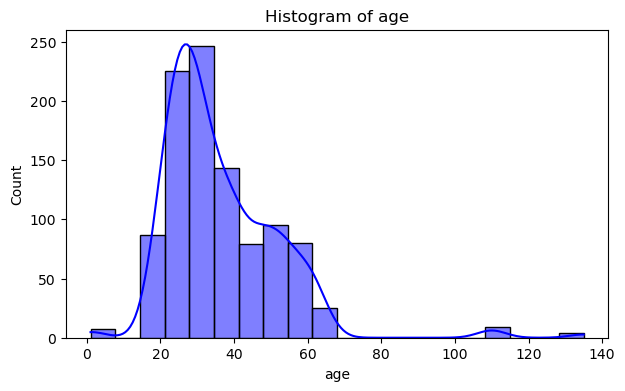

In [42]:
# plot histogram of age.

plt.figure(figsize=(7, 4))
sns.histplot(df_customer.age, bins=20, kde=True, color='blue', edgecolor='black')
# Set the title of the plot
plt.title('Histogram of age')
plt.show()

#### Insights: Age Distribution
- The age distribution is clearly right-skewed, indicating that a majority of customers are young adults, while fewer are in older age groups.
- A few extreme values above 100 years appear to be data anomalies or entry errors.

In [44]:
# Outlier Treatment: Age
# Above we see that min age is 1 and max age is 135. These seem to be outliers. So let's find out age distribution.

min_age = df_customer.age.min()
max_age = df_customer.age.max()

# Display the minimum and maximum age values
min_age, max_age

(1, 135)

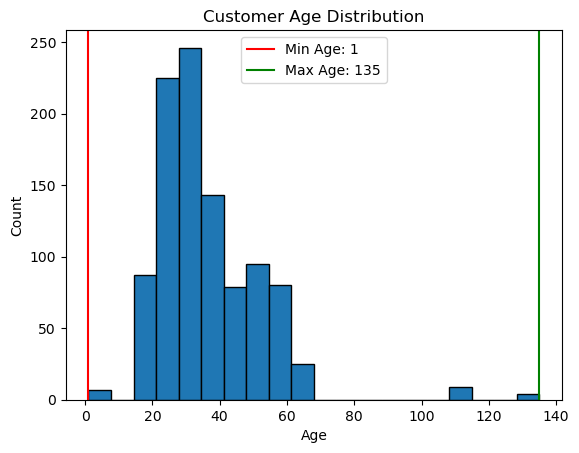

In [45]:
# Plot a histogram of the 'age' column with 20 bins

plt.hist(df_customer.age, bins=20, edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Customer Age Distribution")

plt.axvline(min_age, color="red", label=f"Min Age: {min_age}")
plt.axvline(max_age, color="green", label=f"Max Age: {max_age}")

plt.legend()
plt.show()

In [46]:
# Filter and display rows where 'age' is less than 15 or greater than 80 (potential outliers)

outliers = df_customer[(df_customer.age<15) | (df_customer.age>80)]
outliers

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [47]:
# Display the shape of the 'outliers' DataFrame
df_customer[(df_customer.age<15) | (df_customer.age>80)].shape

(20, 8)

In [48]:
df_customer.age.median()

32.0

In [49]:
# Calculate the median age for each occupation group

median_age_per_occupation = df_customer.groupby("occupation")["age"].median()
median_age_per_occupation

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [50]:
# Iterate over each row in the 'outliers' DataFrame
for index, row in outliers.iterrows():
    median_age = median_age_per_occupation.get(row['occupation'], row['age'])
    df_customer.at[index, 'age'] = int(median_age)


In [51]:
df_customer[(df_customer.age<15) | (df_customer.age>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [52]:
df_customer.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,35.539000,140483.548500
std,288.819436,12.277998,110463.002934
min,1.000000,18.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,44.250000,195514.250000
max,1000.000000,64.000000,449346.000000


#### Data Visualization: Age, Gender, Location

In [54]:
df_customer.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [55]:
# lets define the bin and labels. 
bin_edges = [17, 25, 48, 65]
bin_labels = ['18-25', '26-48', '49-65']

#use the cut function to bin and label the age column
df_customer['age_group'] = pd.cut(df_customer['age'], bins=bin_edges, labels=bin_labels)
df_customer.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married,26-48


In [56]:
# Calculate the percentage distribution of each 'age_group' in the 'df_cust' DataFrame

agt_group_counts = df_customer.age_group.value_counts(normalize=True)*100
agt_group_counts

age_group
26-48    56.7
18-25    24.6
49-65    18.7
Name: proportion, dtype: float64

In [57]:
type(agt_group_counts)

pandas.core.series.Series

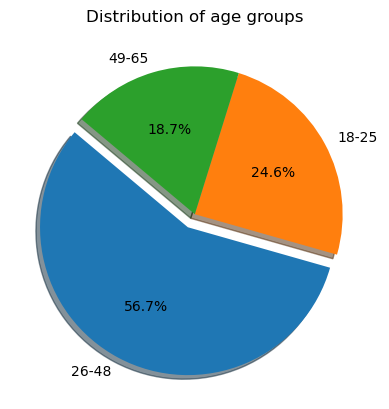

In [58]:
# Plot the pie chart for age group distribution

plt.pie(
        agt_group_counts, 
        labels=agt_group_counts.index, 
        autopct='%1.1f%%', 
        shadow=True, 
        explode=(0.1, 0, 0),
        startangle=140
       )
plt.title('Distribution of age groups')
plt.show()

#### Insights: Age Group Distribution
- Over 56% of customers fall into the 26–48 age group, representing the core customer segment.
- Around 25% of customers are in the 18–25 age bracket, suggesting a strong presence of younger.
- The 49–65 group accounts for 19% of the customer base. While smaller in proportion, they may represent a more financially stable or retirement-focused segment.

In [60]:
df_customer.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married,26-48


In [61]:
df_customer.location.value_counts()

location
City      683
Suburb    232
Rural      85
Name: count, dtype: int64

In [62]:
df_customer.gender.value_counts()

gender
Male      674
Female    326
Name: count, dtype: int64

In [63]:
customer_location_gender = df_customer.groupby(['location', 'gender']).size().unstack()
customer_location_gender

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


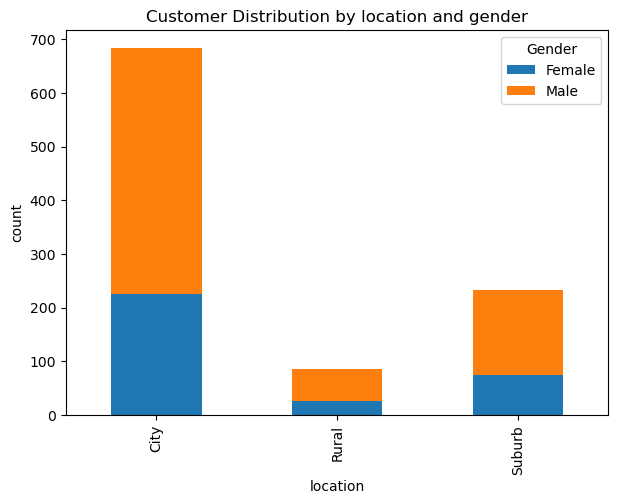

In [64]:
# Create a stacked bar chart to visualize the distribution of customers by location and gender

customer_location_gender.plot(kind="bar", stacked=True, figsize=(7,5))
plt.title('Customer Distribution by location and gender')
plt.legend(title="Gender")
plt.xlabel('location')
plt.ylabel('count')
plt.show()

<h4 style="color:blue;">Explore Credit Score Table</h4>

In [66]:
df_cp.columns

Index(['cust_id', 'credit_score', 'credit_utilisation', 'outstanding_debt',
       'credit_inquiries_last_6_months', 'credit_limit'],
      dtype='object')

#### Dataset Information: `df_cp`

- **cust_id**: Unique identifier assigned to each customer  
- **credit_score**: Numerical score representing the customer's creditworthiness  
- **credit_utilisation**: Ratio of credit used relative to the total credit limit  
- **outstanding_debt**: Total unpaid debt currently owed by the customer (in monetary units)  
- **credit_inquiries_last_6_months**: Number of times the customer’s credit report was pulled in the last 6 months  
- **credit_limit**: Maximum credit amount allotted to the customer (in monetary units)


In [68]:
# Preview the credit profile table
df_cp.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [69]:
# display the number of rows and columns from credit score table. 
df_cp.shape

(1004, 6)

In [70]:
# display the number of rows and columns from customer table. 

df_customer.shape

(1000, 9)

In [71]:
# get unique customer ID's 
df_cp['cust_id'].nunique()

1000

In [72]:
# Find all rows in the df_cs DataFrame that have duplicated customer IDs
"""
df_cp['cust_id'].duplicated(keep=False)
→ Returns a boolean Series (True/False)
→ True for all occurrences of duplicated cust_id values

keep=False
→ Marks all duplicated rows as True (not just the second or first one)
→ So both the original and duplicate entries are returned
"""
df_cp[df_cp['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [73]:
# Remove duplicate rows based on the 'cust_id' column, keeping the last occurrence of each duplicate

df_cp_clean_1 = df_cp.drop_duplicates(subset="cust_id", keep="last")
df_cp_clean_1

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0
...,...,...,...,...,...,...
999,996,564,0.702963,688.0,2.0,1250.0
1000,997,774,0.465462,17139.0,0.0,60000.0
1001,998,529,0.585856,386.0,3.0,1000.0
1002,999,725,0.249670,6973.0,2.0,40000.0


In [74]:
df_cp_clean_1.shape

(1000, 6)

In [75]:
df_cp_clean_1[df_cp_clean_1['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit


In [76]:
df_cp_clean_1.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

It appears that the credit_limit column contains a significant number of missing values, which will need to be addressed during data cleaning. Based on domain knowledge, we understand that a customer's credit limit is typically influenced by their credit score. To address these missing values, we'll explore whether a mathematical relationship exists between credit score and credit limit. If such a relationship is found, we can use it to impute the missing values in the credit_limit column.

In [78]:
# Filter the DataFrame to include only rows where the credit_limit column has null values
df_cp_clean_1[df_cp_clean_1.credit_limit.isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [79]:
# Count the occurrences of each unique value in the credit_limit column
df_cp_clean_1.credit_limit.value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

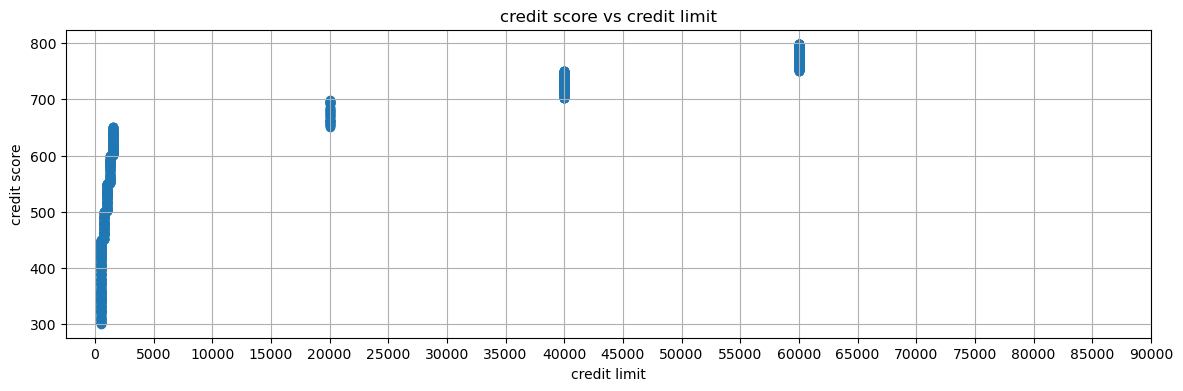

In [80]:
# Looking at scatter plot for credit score vs credit_limit again (after handling oultiers)

plt.figure(figsize=(14, 4))
plt.scatter(df_cp_clean_1.credit_limit, df_cp_clean_1.credit_score)

plt.title('credit score vs credit limit')
plt.xlabel('credit limit')
plt.ylabel('credit score')
plt.grid(True)

# adjust the y-axis bin interval to 1000
plt.xticks(range(0, 90001, 5000))
plt.grid(True)
plt.show()

#### Insights

- Credit Scores ≤ 650: Customers in this range are generally assigned low credit limits, typically below $1,000.

- Credit Scores between 650 and 700: Customers with moderate credit scores tend to receive credit limits around $20,000.

- Credit Scores between 700 and 750: This segment typically qualifies for higher credit limits, averaging around $40,000.

- Credit Scores > 750: Customers in this top tier often receive the highest credit limits, frequently exceeding $60,000.


In [82]:
bin_ranges = [300, 450, 500, 550, 600, 650, 700, 750, 800]

din_labels = [f'{start}-{end-1}' for start, end in zip(bin_ranges, bin_ranges[1:])]
df_cp_clean_1['credit_score_range'] = pd.cut(df_cp_clean_1['credit_score'], bins=bin_ranges, labels=din_labels, include_lowest=True, right=False)
"""
df_cp_clean_1.loc[:, 'credit_score_range'] = pd.cut(
    df_cp_clean_1['credit_score'], 
    bins=bin_ranges, 
    labels=bin_labels, 
    include_lowest=True, 
    right=False
)
"""

"\ndf_cp_clean_1.loc[:, 'credit_score_range'] = pd.cut(\n    df_cp_clean_1['credit_score'], \n    bins=bin_ranges, \n    labels=bin_labels, \n    include_lowest=True, \n    right=False\n)\n"

In [83]:
df_cp_clean_1.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [84]:
df_cp_clean_1

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749
...,...,...,...,...,...,...,...
999,996,564,0.702963,688.0,2.0,1250.0,550-599
1000,997,774,0.465462,17139.0,0.0,60000.0,750-799
1001,998,529,0.585856,386.0,3.0,1000.0,500-549
1002,999,725,0.249670,6973.0,2.0,40000.0,700-749


In [85]:
df_cp_clean_1[df_cp_clean_1.credit_score_range=="750-799"]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
21,22,785,0.897089,36083.0,3.0,60000.0,750-799
25,26,758,0.250811,190838.0,2.0,60000.0,750-799
26,27,766,0.830908,31344.0,3.0,60000.0,750-799
29,30,798,0.222597,7238.0,2.0,60000.0,750-799
31,32,768,0.747793,35109.0,2.0,60000.0,750-799
...,...,...,...,...,...,...,...
988,985,770,0.628088,33405.0,2.0,60000.0,750-799
993,990,772,0.259958,11937.0,2.0,60000.0,750-799
996,993,782,0.477170,20305.0,2.0,60000.0,750-799
1000,997,774,0.465462,17139.0,0.0,60000.0,750-799


In [86]:
df_cp_clean_1[df_cp_clean_1.credit_score_range=="300-449"]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
5,6,442,0.705409,246.0,4.0,500.0,300-449
11,12,429,0.627645,263.0,0.0,500.0,300-449
15,16,347,0.531660,190.0,0.0,500.0,300-449
18,19,447,0.795650,292.0,1.0,500.0,300-449
20,21,381,0.714710,307.0,0.0,500.0,300-449
...,...,...,...,...,...,...,...
981,978,371,0.435307,183.0,2.0,500.0,300-449
982,979,332,0.150815,65.0,1.0,500.0,300-449
984,981,327,0.377202,108.0,3.0,500.0,300-449
989,986,425,0.178470,56.0,4.0,500.0,300-449


For credit score range "750-799" the credit limit is 60K whereas for "300-449" it is 500.Use MODE function to find out most frequently occuring credit limit for a given score range.

In [88]:
# calculat the mode (most frequent value) of the credit_limit column for each credit_score_range group, and store the result in a new DataFrame called mode_df.
mode_df=df_cp_clean_1.groupby("credit_score_range", observed=True)["credit_limit"].agg(lambda x: x.mode().iloc[0]).reset_index()
mode_df

,credit_score_range,credit_limit
0,300-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-649,1500.0
5,650-699,20000.0
6,700-749,40000.0
7,750-799,60000.0


In [89]:
df_cp_clean_1[df_cp_clean_1.credit_limit.isnull()].sample(5)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
845,842,490,0.555309,249.0,1.0,NaN,450-499
467,468,354,0.892740,231.0,2.0,NaN,300-449
278,279,741,0.352932,10846.0,1.0,NaN,700-749
856,853,497,0.873269,416.0,3.0,NaN,450-499
931,928,311,0.832244,316.0,2.0,NaN,300-449


In [90]:
pd.merge(df_cp_clean_1, mode_df, on="credit_score_range")

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit_x,credit_score_range,credit_limit_y
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0
...,...,...,...,...,...,...,...,...
995,996,564,0.702963,688.0,2.0,1250.0,550-599,1250.0
996,997,774,0.465462,17139.0,0.0,60000.0,750-799,60000.0
997,998,529,0.585856,386.0,3.0,1000.0,500-549,1000.0
998,999,725,0.249670,6973.0,2.0,40000.0,700-749,40000.0


In [91]:
# Merge the mode values back with the original DataFrame

pd.merge(df_cp_clean_1, mode_df, on="credit_score_range", suffixes=("", "_mode"))

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0
...,...,...,...,...,...,...,...,...
995,996,564,0.702963,688.0,2.0,1250.0,550-599,1250.0
996,997,774,0.465462,17139.0,0.0,60000.0,750-799,60000.0
997,998,529,0.585856,386.0,3.0,1000.0,500-549,1000.0
998,999,725,0.249670,6973.0,2.0,40000.0,700-749,40000.0


In [92]:
df_cs_clean_2=pd.merge(df_cp_clean_1, mode_df, on="credit_score_range", suffixes=("", "_mode"))
df_cs_clean_2.sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
538,539,775,0.519054,26482.0,4.0,60000.0,750-799,60000.0
555,556,434,0.681202,251.0,1.0,500.0,300-449,500.0
71,72,625,0.670371,845.0,1.0,1500.0,600-649,1500.0


In [93]:
df_cs_clean_2[df_cs_clean_2.credit_limit.isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
467,468,354,0.892740,231.0,2.0,NaN,300-449,500.0
37,38,514,0.296971,238.0,2.0,NaN,500-549,1000.0
72,73,323,0.858835,216.0,1.0,NaN,300-449,500.0


In [94]:
df_cs_clean_3 = df_cs_clean_2.copy()

# Replace NaN values in the credit_limit column with the corresponding credit_limit_mode values
df_cs_clean_3['credit_limit'].fillna(df_cs_clean_2['credit_limit_mode'], inplace=True)
df_cs_clean_3.shape

(1000, 8)

In [95]:
df_cs_clean_3[df_cs_clean_3.credit_limit.isnull()].shape

(0, 8)

In [96]:
df_cs_clean_3.isnull().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
credit_limit_mode                 0
dtype: int64

In [97]:
df_cs_clean_3.loc[[10,35]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
10,11,679,0.557450,9187.0,2.0,20000.0,650-699,20000.0
35,36,790,0.112535,4261.0,1.0,60000.0,750-799,60000.0


In [98]:
df_cs_clean_3.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.75000,19912.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.43818,24840.914633
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.00000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000,60000.000000


Insights:  
Observing the minimum and maximum values for various columns reveals that the maximum value of outstanding_debt is greater than the maximum value of credit_limit. Based on business understanding, the maximum debt a customer can have is equal to the credit limit, as spending beyond the credit limit is not allowed.

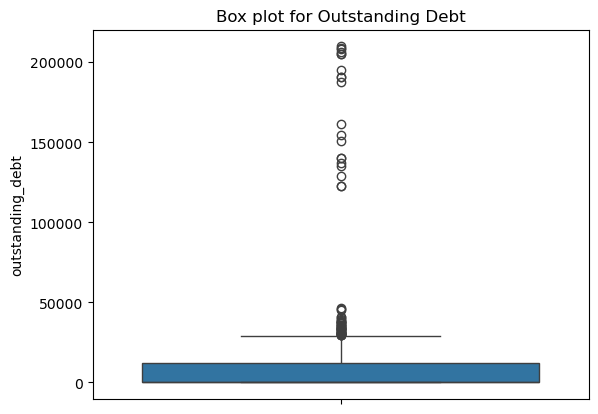

In [100]:
# Create a box plot for the outstanding_debt column
sns.boxplot(df_cs_clean_3.outstanding_debt)
plt.title('Box plot for Outstanding Debt')
plt.show()

#### Insights:  
- There are several outliers with debts ranging from just above 50,000 to over 200,000, indicating that a small number of customers have exceptionally high outstanding debts.  
- The box plot shows that the majority of customers have relatively low outstanding debts, with the interquartile range (IQR) and whiskers showing the spread of the bulk of the data.
- This visualization helps identify the typical range of outstanding debts and highlights the presence of significant outliers in the dataset.Instead of using any statistical approach (such as standard deviation or IQR),using business knowledge, any outstanding debt greater than the credit limit will be marked as an outlier.

In [102]:
# Filter the DataFrame to include only rows where the outstanding_debt is greater than the credit_limit
df_cs_clean_3[df_cs_clean_3.outstanding_debt>df_cs_clean_3.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
19,20,647,0.439132,205014.0,3.0,1500.0,600-649,1500.0
25,26,758,0.250811,190838.0,2.0,60000.0,750-799,60000.0
38,39,734,0.573023,122758.0,3.0,40000.0,700-749,40000.0
93,94,737,0.739948,137058.0,2.0,40000.0,700-749,40000.0
204,205,303,0.364360,187849.0,0.0,500.0,300-449,500.0
271,272,703,0.446886,154568.0,1.0,40000.0,700-749,40000.0
301,302,722,0.608076,122402.0,4.0,40000.0,700-749,40000.0
330,331,799,0.363420,208898.0,4.0,60000.0,750-799,60000.0
350,351,320,0.285081,150860.0,0.0,500.0,300-449,500.0


In [103]:
df_cs_clean_3.loc[df_cs_clean_3.outstanding_debt>df_cs_clean_3.credit_limit, 'outstanding_debt']

1      161644.0
19     205014.0
25     190838.0
38     122758.0
93     137058.0
204    187849.0
271    154568.0
301    122402.0
330    208898.0
350    150860.0
446    206191.0
544    135112.0
636    140063.0
646    128818.0
698    190717.0
723    140008.0
725    205404.0
730    209901.0
766    195004.0
862    208406.0
Name: outstanding_debt, dtype: float64

In [104]:
df_cs_clean_3.loc[df_cs_clean_3.outstanding_debt>df_cs_clean_3.credit_limit, 'outstanding_debt'] = df_cs_clean_3['credit_limit']

In [105]:
df_cs_clean_3[df_cs_clean_3.outstanding_debt>df_cs_clean_3.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


In [106]:
df_cs_clean_3.loc[[1,19]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
1,2,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
19,20,647,0.439132,1500.0,3.0,1500.0,600-649,1500.0


#### Correlation among Credit Profile variables

In [108]:
df_cs_clean_3.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [109]:
df_customer.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married,26-48


In [110]:
df_merged = df_customer.merge(df_cs_clean_3, on = "cust_id", how = "inner")
df_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [111]:
df_merged[["credit_score", "credit_limit"]].corr()

,credit_score,credit_limit
credit_score,1.000000,0.847952
credit_limit,0.847952,1.000000


In [112]:
df_merged[["credit_score", "age"]].corr()

,credit_score,age
credit_score,1.000000,0.444961
age,0.444961,1.000000


In [113]:
df_merged._get_numeric_data()

,cust_id,age,annual_income,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
0,1,51,358211.0,749,0.585171,19571.0,0.0,40000.0,40000.0
1,2,47,65172.0,587,0.107928,1250.0,2.0,1250.0,1250.0
2,3,21,22378.0,544,0.854807,513.0,4.0,1000.0,1000.0
3,4,24,33563.0,504,0.336938,224.0,2.0,1000.0,1000.0
4,5,48,39406.0,708,0.586151,18090.0,2.0,40000.0,40000.0
...,...,...,...,...,...,...,...,...,...
995,996,26,46759.0,564,0.702963,688.0,2.0,1250.0,1250.0
996,997,55,290061.0,774,0.465462,17139.0,0.0,60000.0,60000.0
997,998,29,139141.0,529,0.585856,386.0,3.0,1000.0,1000.0
998,999,47,261191.5,725,0.249670,6973.0,2.0,40000.0,40000.0


In [114]:
numerical_cols = ['credit_score', 'credit_utilisation', 'outstanding_debt', 'credit_limit', 'annual_income', 'age']
correlation_matrix = df_merged[numerical_cols].corr()
correlation_matrix

,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income,age
credit_score,1.000000,-0.070445,0.680654,0.847952,0.575751,0.444961
credit_utilisation,-0.070445,1.000000,0.192838,-0.080493,-0.086368,-0.027828
outstanding_debt,0.680654,0.192838,1.000000,0.810581,0.555661,0.444375
credit_limit,0.847952,-0.080493,0.810581,1.000000,0.684775,0.511091
annual_income,0.575751,-0.086368,0.555661,0.684775,1.000000,0.619103
age,0.444961,-0.027828,0.444375,0.511091,0.619103,1.000000


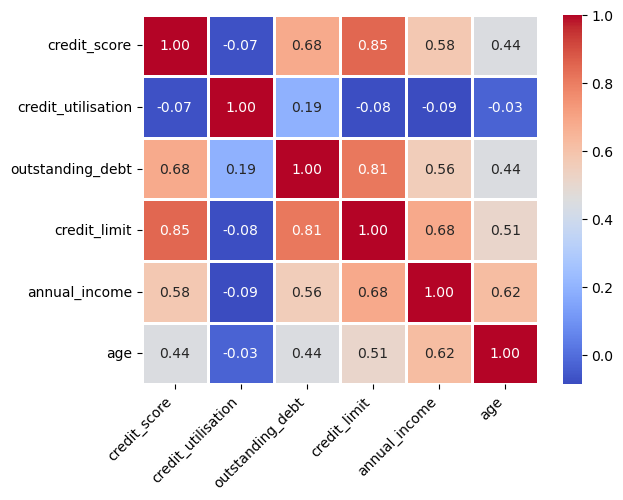

In [115]:
# Create a heatmap of the correlation matrix

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.9)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

#### Insights:  
- Credit Score and Credit Limit: A strong positive correlation (0.85) indicates that customers with higher credit scores are typically granted higher credit limits.
- Outstanding Debt and Credit Limit: The high correlation (0.81) suggests that individuals with larger credit limits often carry higher levels of outstanding debt.
- Credit Score and Outstanding Debt: A moderate positive correlation (0.68) implies that customers with higher credit scores also tend to manage higher amounts of debt, potentially reflecting stronger creditworthiness.
- Annual Income and Age: With a correlation of 0.62, this relationship shows that older customers generally report higher annual incomes.
- credit_utilisation shows negligible or slightly negative correlation with all other variables, suggesting that it behaves independently and may reflect individual credit usage patterns rather than financial strength.

<h4 style="color:blue;">Explore Transaction Table</h4>

In [118]:
df_transactions.columns

Index(['tran_id', 'cust_id', 'tran_date', 'tran_amount', 'platform',
       'product_category', 'payment_type'],
      dtype='object')

### Dataset Information: `df_transactions`

- **tran_id**: Unique identifier for each transaction record  
- **cust_id**: Identifier linking the transaction to a specific customer  
- **tran_date**: Date on which the transaction was executed  
- **tran_amount**: Monetary value of the transaction  
- **platform**: E-commerce platform where the transaction occurred (e.g., Flipkart, Amazon, Shopify, Alibaba)  
- **product_category**: Category of the purchased product (e.g., Electronics, Fashion & Apparel, Sports)  
- **payment_type**: Mode of payment used for the transaction (e.g., PhonePe, Credit Card, GPay, Net Banking)


In [120]:
# Read transaction table 
df_transactions.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [121]:
df_transactions.shape

(500000, 7)

In [122]:
df_transactions.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

Platform contain more null values. 

In [124]:

# Filter the DataFrame to include only rows where the platform column has null values
df_transactions[df_transactions.platform.isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,None,Electronics,Net Banking
418,419,383,2023-01-01,338,None,Electronics,Credit Card
607,608,421,2023-01-01,700,None,Electronics,Phonepe
844,845,945,2023-01-01,493,None,Sports,Credit Card
912,913,384,2023-01-01,85,None,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,None,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,None,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,None,Sports,Net Banking
499833,499834,616,2023-09-05,97,None,Fashion & Apparel,Credit Card


In [125]:
df_transactions.platform.unique()

array(['Flipkart', 'Alibaba', 'Shopify', 'Amazon', 'Ebay', 'Meesho',
       'Cred', None], dtype=object)

In [126]:
df_transactions.platform.mode()

0    Amazon
Name: platform, dtype: object

In [127]:
df_transactions.platform.value_counts()

platform
Amazon      151443
Flipkart    122660
Alibaba      73584
Meesho       73271
Shopify      39416
Cred         24741
Ebay          9944
Name: count, dtype: int64

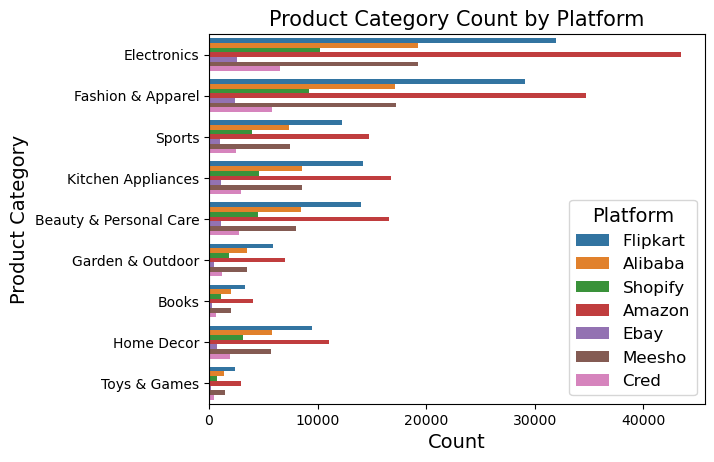

In [128]:
# Create a count plot of product_category with a hue of platform
sns.countplot(y="product_category", hue="platform", data=df_transactions)
plt.title('Product Category Count by Platform', fontsize=15)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Product Category', fontsize=14)

plt.legend(title='Platform', fontsize=12, title_fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Insights  
- Amazon emerges as the most frequently used platform across all product categories, with particularly strong dominance in Electronics, Fashion & Apparel, and Kitchen Appliances.  

- While Amazon leads overall, platforms such as Flipkart, Alibaba, and Shopify also show notable activity in specific categories. For example, Flipkart is actively used in Fashion & Apparel and Kitchen Appliances, while Alibaba shows a strong presence in Fashion & Apparel and Beauty & Personal Care.

- Category Trends Across Platforms, Although category preferences vary by platform, Electronics and Fashion & Apparel stand out as the most commonly purchased product categories overall.

- Handling Missing Platform Data: Considering Amazon's consistently high usage, imputing missing values in the platform column with "Amazon" appears to be a practical and data-supported approach.

In [130]:
df_transactions.platform.mode()[0]

'Amazon'

In [131]:
#df_transactions.platform.fillna(df_transactions.platform.mode()[0], inplace=True)

df_transactions['platform'] = df_transactions['platform'].fillna(df_transactions['platform'].mode()[0])


In [132]:
df_transactions.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

#### Data Cleaning: Treat Outliers using IQR (Transaction Amount)

In [134]:
df_transactions.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [135]:
df_transactions.shape

(500000, 7)

In [136]:
df_trans_zero = df_transactions[df_transactions.tran_amount==0]
df_trans_zero.shape

(4734, 7)

In [137]:
df_trans_zero.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card


In [138]:
df_trans_zero.platform.value_counts()

platform
Amazon    4734
Name: count, dtype: int64

In [139]:
df_trans_zero.product_category.value_counts()

product_category
Electronics    4734
Name: count, dtype: int64

In [140]:
df_trans_zero.payment_type.value_counts()

payment_type
Credit Card    4734
Name: count, dtype: int64

In [141]:
# other way of getting the value count for multiple coulumns.
# Filter the DataFrame to include only rows where platform is 'Amazon', product_category is 'Electronics', and payment_type is 'Credit Card'
df_trans_1 = df_transactions[(df_transactions.platform=='Amazon') & (df_transactions.product_category=="Electronics") & (df_transactions.payment_type=="Credit Card")]
df_trans_1.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card


In [142]:
df_trans_1[df_trans_1.tran_amount>0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card
263,264,528,2023-01-01,421,Amazon,Electronics,Credit Card
311,312,936,2023-01-01,537,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499766,499767,723,2023-09-05,909,Amazon,Electronics,Credit Card
499793,499794,586,2023-09-05,304,Amazon,Electronics,Credit Card
499812,499813,688,2023-09-05,425,Amazon,Electronics,Credit Card
499860,499861,373,2023-09-05,480,Amazon,Electronics,Credit Card


In [143]:
# Calculate the median transaction amount for the filtered DataFrame where the transaction amount is greater than 0

median_to_replace = df_trans_1[df_trans_1.tran_amount>0].tran_amount.median()
median_to_replace

554.0

In [144]:
# df_transactions['tran_amount'].replace(0,median_to_replace, inplace=True)

df_transactions['tran_amount'] = df_transactions['tran_amount'].replace(0, median_to_replace)


In [145]:
df_transactions.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3230.452602
std,144337.711634,288.641924,13097.561071
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,146.000000
75%,375000.250000,752.000000,413.000000
max,500000.000000,1000.000000,69999.000000


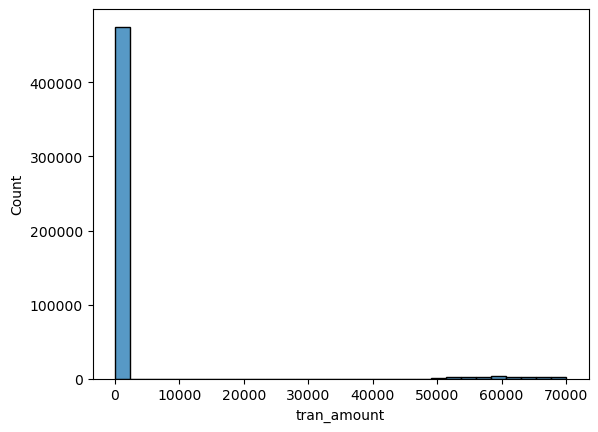

In [146]:
sns.histplot(df_transactions.tran_amount, bins=30)
plt.show()

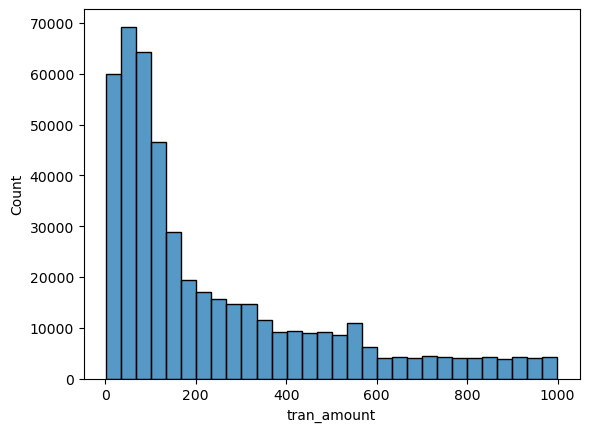

In [147]:
sns.histplot(df_transactions[df_transactions.tran_amount<10000].tran_amount, bins=30)
plt.show()

In [148]:
# Calculate the 1st quartile (25th percentile) and 3rd quartile (75th percentile) of the transaction amounts
#use IQR to analyze outliers
Q1, Q3 = df_transactions['tran_amount'].quantile([0.25, 0.75])

IQR = Q3 - Q1

lower = Q1 - 2*IQR
upper = Q3 + 2*IQR

lower, upper


(-628.0, 1107.0)

In [149]:
df_tran_outliers = df_transactions[df_transactions.tran_amount>=upper]
df_tran_outliers

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


In [150]:
df_tran_outliers.shape

(25000, 7)

In [151]:
df_trans_normal = df_transactions[df_transactions.tran_amount<upper]
df_trans_normal.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [152]:
tran_mean_per_category = df_trans_normal.groupby("product_category")["tran_amount"].mean()
tran_mean_per_category

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [153]:
df_transactions.loc[df_tran_outliers.index, 'tran_amount'] = df_tran_outliers['product_category'].map(tran_mean_per_category)

In [154]:
df_transactions.loc[df_tran_outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,176.773288,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,64.553463,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,176.773288,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,64.553463,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,64.553463,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,269.181631,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,269.181631,Meesho,Sports,Gpay


In [155]:
df_transactions.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99.0,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471.0,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33.0,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68.0,Amazon,Fashion & Apparel,Net Banking


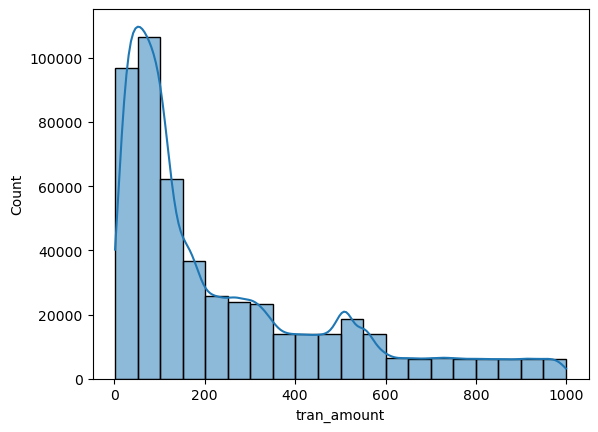

In [156]:
sns.histplot(df_transactions.tran_amount, kde = True, bins = 20)
plt.show()

#### Insights:  
- Right-Skewed Distribution: The distribution of transaction amounts is right-skewed, with the majority of transactions being of smaller amounts.

- High Frequency of Small Transactions: The highest frequency of transactions is within the lower range, particularly between 0 and 100.

#### Data Visualization: Transactions Table

In [159]:
df_transactions.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99.0,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471.0,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33.0,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68.0,Amazon,Fashion & Apparel,Net Banking


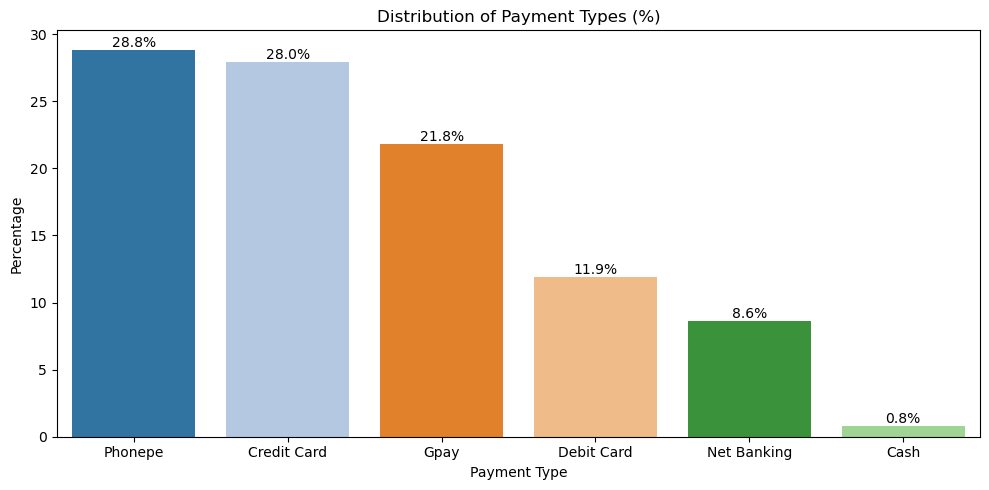

In [321]:
# Step 1: Calculate percentages
payment_percent = df_transactions['payment_type'].value_counts(normalize=True).reset_index()
payment_percent.columns = ['payment_type', 'percent']
payment_percent['percent'] *= 100

# Step 2: Plot with bar labels
plt.figure(figsize=(10, 5))

ax = sns.barplot(
    x='payment_type', 
    y='percent', 
    data=payment_percent, 
    hue='payment_type', 
    palette='tab20', 
    legend=False  # Hides duplicate legend
)

# Add percentage labels on top of bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1f}%",               # Format percentage to 1 decimal
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center', 
        va='bottom',
        fontsize=10,
        #fontweight='bold'
    )

plt.title('Distribution of Payment Types (%)')
plt.ylabel('Percentage')
plt.xlabel('Payment Type')
plt.tight_layout()
plt.show()


#### Insights  
- PhonePe (28.8%) is the most widely used payment method, indicating a strong preference for UPI-based mobile wallets among customers.
- Credit Card usage (28.0%) closely follows PhonePe, suggesting that a significant portion of users still rely on traditional credit based transactions , possibly for benefits like EMI options or reward points.
- GPay (21.8%) holds a solid third position, further confirming the growing adoption of UPI and mobile-first payment solutions.
- Debit Cards (11.9%) and Net Banking (8.6%) are used less frequently, showing that customers are increasingly shifting away from conventional banking methods for online purchases.
- Cash (0.8%) is almost negligible, underscoring a near-complete shift toward digital payments.


In [161]:
df_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [162]:
df_merged_2 = pd.merge(df_merged, df_transactions, on = "cust_id", how = "inner")
df_merged_2.head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay


In [163]:
df_merged_2.shape

(500000, 22)

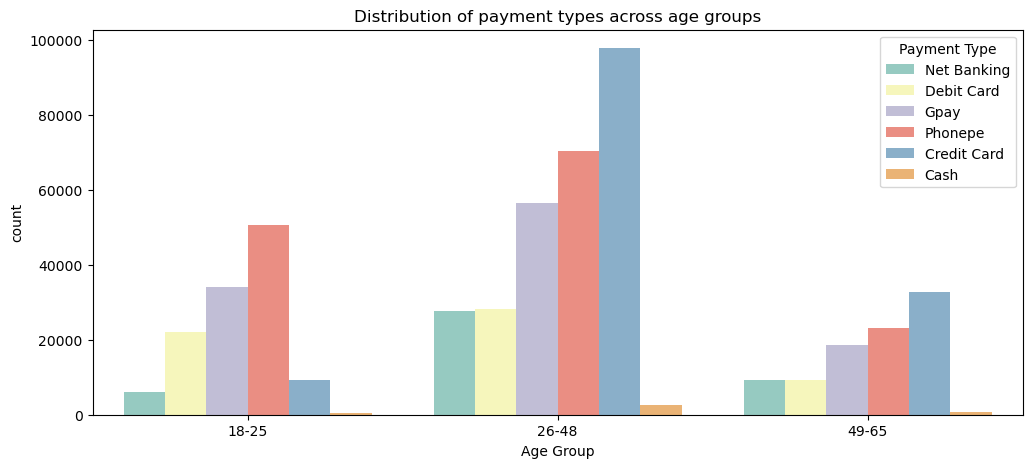

In [453]:
plt.figure(figsize=(12, 5))

sns.countplot(x = 'age_group', hue='payment_type', data=df_merged_2, palette = 'Set3')
plt.title("Distribution of payment types across age groups")
plt.xlabel('Age Group')
plt.ylabel('count')
plt.legend(title = 'Payment Type', loc = 'upper right')
plt.show()

#### Insights  
- Age Group 18–25 relies more on UPI payments, especially PhonePe and GPay indicating a preference for digital payment methods. Credit Card usage is lowest here, likely due to limited credit access or lower income eligibility.
- Age Group 26–48 shows the highest transaction volume across all payment methods, reflecting this segment's dominance in digital and card-based transactions. Credit Card usage is most prominent in this group, indicating higher financial maturity and purchasing power.  
- Age Group 49–65 shows moderate preference toward Credit Card and PhonePe, but overall transaction volume is lower than younger groups.  
- Overall, digital payment methods like Phonepe and Gpay are popular among younger age groups, while Credit Card usage is high across all age groups, particularly in the 26-48 range.Age group 18-25 has less exposure to credit cards compared to other groups.


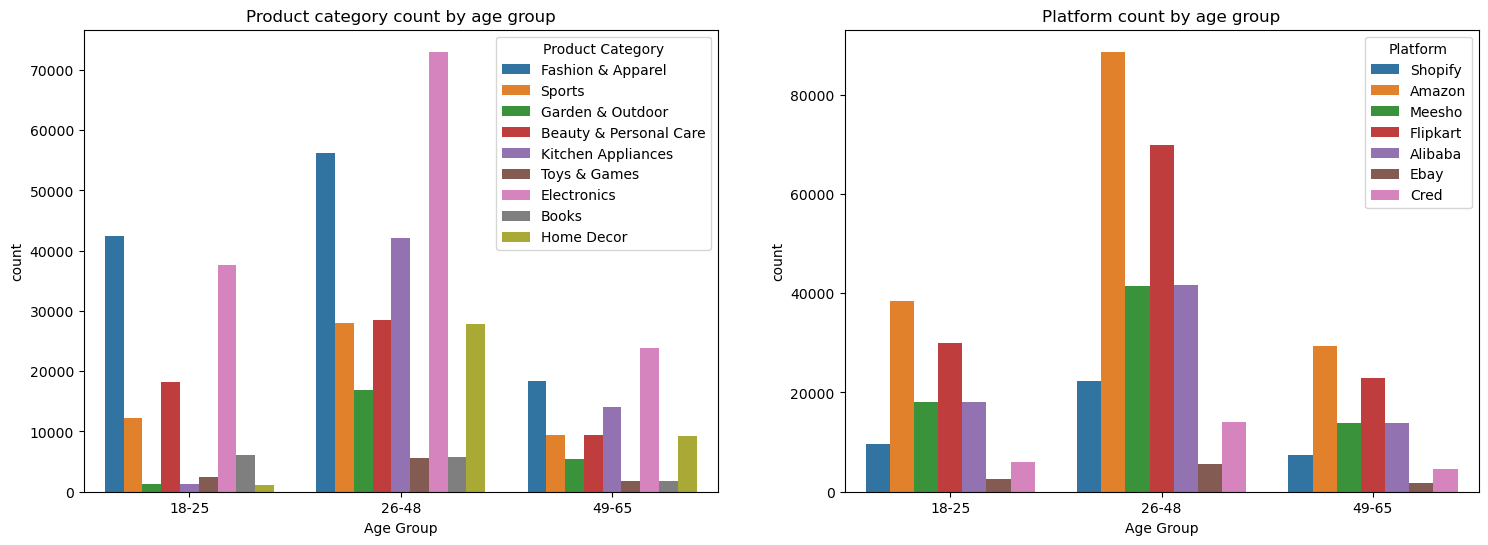

In [340]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize =(18, 6))

# Plot the product category count by age group
sns.countplot(x = 'age_group', hue='product_category', data=df_merged_2, ax=ax1)
ax1.set_title("Product category count by age group")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("count")
ax1.legend(title="Product Category", loc='upper right')

# Plot the platform count by age group
sns.countplot(x = 'age_group', hue='platform', data=df_merged_2, ax=ax2)
ax2.set_title("Platform count by age group")
ax2.set_xlabel("Age Group")
ax2.set_ylabel("count")
ax2.legend(title="Platform", loc='upper right')

plt.show()

#### Insights  
**Product Category Preferences by Age Group**
-  Age Group 18–25 shows strong interest in Fashion & Apparel, Electronics, Beauty & Personal Care. These trends reflect youth-driven shopping behaviors focused on tech, lifestyle, and personal grooming.
-  Age Group 26–48 dominates across most product categories, especially in Electronics, Fashion & Apparel, Kitchen Appliances, Home Decor. This group represents the most active and diverse segment of shoppers.  
-  Age Group 49–65 contributes less in volume but still engages in Electronics, Fashion & Apparel, Home Decor

**Platform Usage by Age Group**  
- Amazon is the leading platform across all age groups — especially dominant among 26–48 users.
- Flipkart and Alibaba are strong alternatives, particularly for the 26–48 and 18–25 groups.  
- Meesho sees noticeable activity in 18–25 and 26–48, likely due to its budget-friendly, trend-driven product range.
- Shopify and Cred are more active in the 26–48 segment, indicating a skew toward entrepreneurial or premium consumer behavior.
- Ebay has minimal usage.


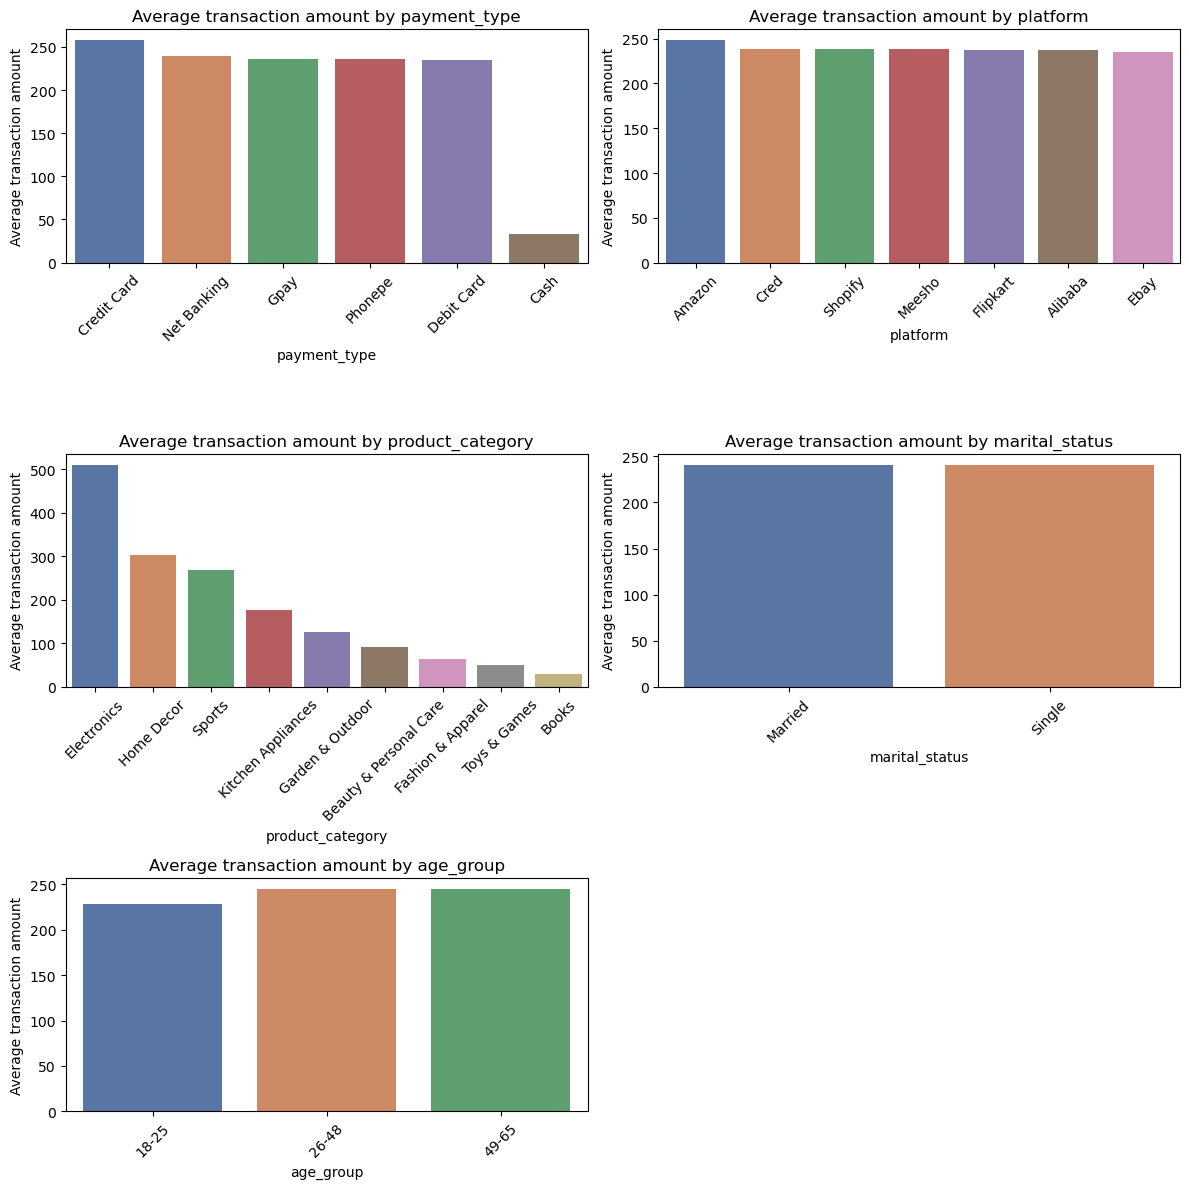

In [166]:
# List of categorical columns
cat_cols = ['payment_type', 'platform', 'product_category', 'marital_status', 'age_group']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average transaction amount for each category
    avg_tran_amount_by_category = df_merged_2.groupby(cat_col, observed=True)['tran_amount'].mean().reset_index()
    
    # Sort the data by 'tran_amount' before plotting
    sorted_data = avg_tran_amount_by_category.sort_values(by='tran_amount', ascending=False)
    
    sns.barplot(
        x=cat_col,
        y='tran_amount',
        hue=cat_col,                    # Fix for palette warning
        data=sorted_data,
        errorbar=None,                  # Fix for deprecated ci=None
        ax=axes[i],
        palette='deep',
        legend=False                    # Optional: removes duplicated legend entries
    )
    
    axes[i].set_title(f'Average transaction amount by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average transaction amount')

    # Safer way to rotate x-axis labels
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [167]:
df_transactions.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,240.672998
std,144337.711634,288.641924,241.696597
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,64.553463
50%,250000.500000,502.000000,133.000000
75%,375000.250000,752.000000,349.000000
max,500000.000000,1000.000000,999.000000


#### Further Analysis On Age Group

In [169]:
# Group the data by age group and calculate the average credit_limit and credit_score

age_group_metrics = df_merged.groupby('age_group', observed = True)[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()
age_group_metrics

,age_group,annual_income,credit_limit,credit_score
0,18-25,37091.235772,1130.081301,484.451220
1,26-48,145869.623457,20560.846561,597.569665
2,49-65,260165.925134,41699.197861,701.524064


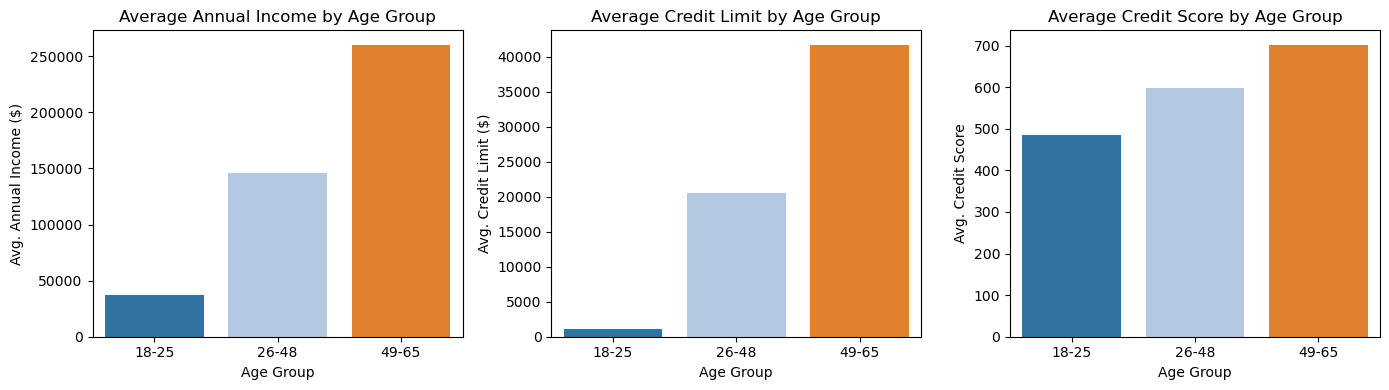

In [170]:
# Create subplots (3 horizontal charts)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))

# Plot 1: Average annual income
sns.barplot(x='age_group', y='annual_income', data=age_group_metrics, hue='age_group', palette='tab20', ax=ax1, legend=False)
ax1.set_title('Average Annual Income by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Avg. Annual Income ($)')
ax1.tick_params(axis='x', rotation=0)

# Plot 2: Average credit limit
sns.barplot(x='age_group', y='credit_limit', data=age_group_metrics, hue='age_group', palette='tab20', ax=ax2, legend=False)
ax2.set_title('Average Credit Limit by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Avg. Credit Limit ($)')
ax2.tick_params(axis='x', rotation=0)

# Plot 3: Average credit score
sns.barplot(x='age_group', y='credit_score', data=age_group_metrics, hue='age_group', palette='tab20', ax=ax3, legend=False)
ax3.set_title('Average Credit Score by Age Group')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Avg. Credit Score')
ax3.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


<h4 style="color:blue;">Finalize Target Market For a Trial Credit Card Launch</h4>

##### Insights for the Age Group 18–25

Customer Base Share:  
-Individuals aged 18–25 account for ~24.6% of the total customer base.

Income & Financial Background:  
-The average annual income is below $50,000, indicating limited earning capacity.  
-This age group shows limited credit history, as reflected in their low credit scores and modest credit limits.

Spending & Card Behavior:  
-Credit card usage is relatively low compared to older age groups. Likely due to a combination of income level and lack of prior credit experience.

Top Spending Categories:  
The most popular product categories among this group are:
1. Electronics
2. Fashion & Apparel
3. Beauty & Personal Care

These categories suggest a high interest in lifestyle and aspirational spending, despite limited financial leverage.

<h2 align="center" style="color:purple">Phase 2: AtliQ0 Bank Credit Card Project</h2>

<h4 style="color:blue;">In the Phase 2 of the project, Business Analysis and launch of AB testing</h4>

#### Pre-Campaign
To conduct a trial run for the new credit card, it is necessary to determine the number of customers required for A/B testing. This involves forming both a control and a test group. The number of customers in each group will be based on the agreed-upon statistical power and effect size, following discussions with the business team.

In [349]:
# Define parameters for power analysis

alpha = 0.05
power = 0.8
effect_size=0.2

sms.tt_ind_solve_power(
    effect_size=0.2, 
    alpha=alpha, 
    power=power, 
    ratio=1, 
    alternative='two-sided'
)

393.4056989990335

For an effect size of 0.2, a sample of 393 customers is required. However, considering potential budget constraints, it would be prudent to evaluate sample size requirements across multiple effect sizes. This will allow us to have an informed discussion with the business team and determine the most cost-effective and statistically appropriate sample size for the campaign.

In [355]:
# Calculate the required sample size for different effect sizes
effect_sizes = [0.1, 0.2, 0.3, 0.4, 0.5,1]  #  standard deviations greater than control group 

for effect_size in effect_sizes:
    sample_size = sms.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1, alternative='two-sided')
    print(f"Effect Size: {effect_size}, Required Sample Size: {int(sample_size)} customers")

Effect Size: 0.1, Required Sample Size: 1570 customers
Effect Size: 0.2, Required Sample Size: 393 customers
Effect Size: 0.3, Required Sample Size: 175 customers
Effect Size: 0.4, Required Sample Size: 99 customers
Effect Size: 0.5, Required Sample Size: 63 customers
Effect Size: 1, Required Sample Size: 16 customers


Based on the business requirements, the test should be designed to detect a minimum effect size of 0.4 standard deviations between the control and test groups. For this effect size, a sample size of 100 customers is required. After discussions with the business team, it was confirmed that 100 customers aligns with their budget constraints for this trial run.

#### Insights  
- Customer Selection: From a pool of approximately 246 customers aged 18 to 25, a subset of 100 customers was selected for the initial campaign launch.  

- Campaign Design: The campaign was executed with 100 customers in the test group, based on effect size calculations and budget considerations. The campaign was scheduled to run for a duration of 2 months.  

- Test Group Response: The campaign achieved a conversion rate of ~40%, meaning that 40 out of 100 customers in the test group started using the newly launched credit card.  

- Control Group Formation: To maintain statistical balance, a control group of 40 customers was established. These individuals were completely separate from the 100 customers in the test group.  

- AB Test Setup: As a result, both test and control groups consist of 40 customers each.  

- Post-Campaign Evaluation: At the end of the 2-month period, daily transaction data was collected to compare the average transaction amounts between the control group (using existing credit cards) and the test group (using the newly launched credit card).  

- KPI Focus: The primary KPI for this A/B test is to assess whether the new credit card improves the average transaction value among customers.

#### Post-Campaign

In [410]:
# Loading campaign results data
df = pd.read_csv('avg_transactions_after_campaign.csv')
df.head(4)

,campaign_date,control_group_avg_tran,test_group_avg_tran
0,2023-09-10,259.83,277.32
1,2023-09-11,191.27,248.68
2,2023-09-12,212.41,286.61
3,2023-09-13,214.92,214.85


In [412]:
df.shape

(62, 3)

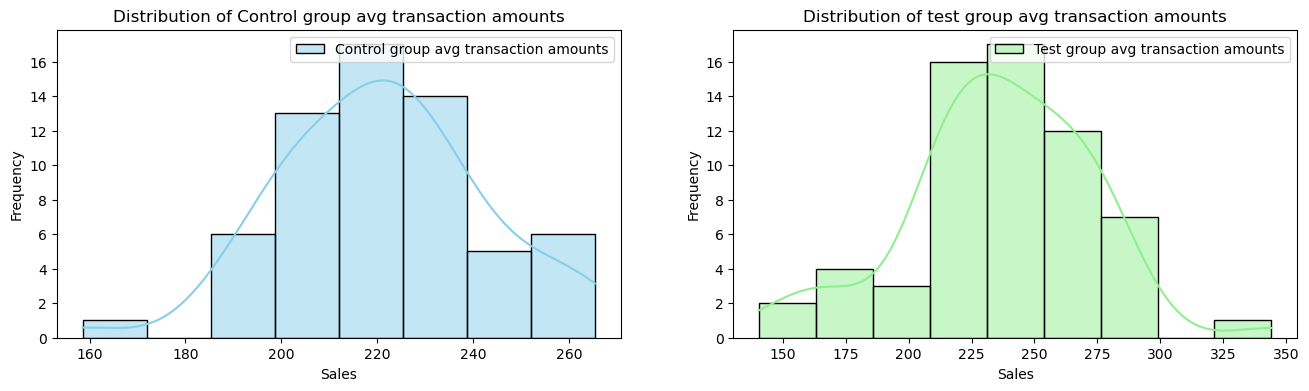

In [414]:
# Let's look at distributions of avg transactions amounts in both groups
# Create a 1x2 grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

# Plot the distribution of Campaign A Sales
sns.histplot(df['control_group_avg_tran'], kde=True, color='skyblue', label='Control group avg transaction amounts', ax=ax1)
ax1.set_xlabel('Sales')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Control group avg transaction amounts')
ax1.legend(loc='upper right')

# Plot the distribution of Campaign B Sales
sns.histplot(df['test_group_avg_tran'], kde=True, color='lightgreen', label='Test group avg transaction amounts', ax=ax2)
ax2.set_xlabel('Sales')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of test group avg transaction amounts')
ax2.legend(loc='upper right')

# Show the plots
plt.show()

#### Hypotheses: 
- Null Hypothesis (H0): The new credit card does not significantly increase the usage or transaction amounts compared to the existing credit card.  

- Alternative Hypothesis (H1): The new credit card significantly increases the usage or transaction amounts compared to the existing credit card.

#### Perform Hypothesis Testing Using Two Sample Z-test

In [418]:
# Calculate the mean and standard deviation of the control group's average transactions
control_mean = df["control_group_avg_tran"].mean()
control_std = df["control_group_avg_tran"].std()
control_mean, control_std

(221.1751612903226, 21.359192112027014)

In [420]:
# Calculate the mean and standard deviation of the test group's average transactions
test_mean = df["test_group_avg_tran"].mean()
test_std = df["test_group_avg_tran"].std()
test_mean, test_std

(235.9835483870968, 36.65808210918637)

In [444]:
# Calculate the sample size by getting the number of rows in the dataset
sample_size = df.shape[0]
sample_size

62

#### Test Using Rejection Region (Critical Z Value)

In [425]:
# Calculate the variance divided by the sample size for both control and test groups
a = (control_std**2/sample_size)
b = (test_std**2/sample_size)

# Calculate the Z-score for the difference in means between the test and control groups
Z_score = (test_mean-control_mean)/np.sqrt(a+b)
Z_score

2.7482973745691135

In [427]:
# For a significance level of 5% (0.05) in a right-tailed test, the critical Z-value is approximately 1.645
critical_z_value = st.norm.ppf(1 - alpha)  # Right-tailed test at 5% significance level
critical_z_value

1.6448536269514722

In [429]:
# Compare the calculated Z-score with the critical Z-value to determine statistical significance
Z_score > critical_z_value

True

#### Insights  
- Since Z score is higher than critical Z value, we can reject the null hypothesis.

#### Test Using p-Value

In [433]:
# Calculate the p-value corresponding to z score for a right-tailed test
p_value = 1 - st.norm.cdf(Z_score)
p_value

0.0029952824622024865

In [435]:
p_value < alpha # p value is less than significance level of 5% (or 0.05 for absolute value)

True

Since p value is less than significance level (i.e. alpha), we can reject the null hypothesis.

##### Using Ready Made API call

In [441]:
# Performing Z-test with above considerations
z_statistic, p_value = sm.stats.ztest( df['test_group_avg_tran'],df['control_group_avg_tran'],alternative = 'larger')
z_statistic, p_value

(2.7482973745691135, 0.002995282462202502)

#### **Conclusion**  
- Statistical Significance, Since the p-value (0.003) is well below the common significance level of 0.05, we reject the null hypothesis. This indicates a statistically significant difference between the test group and the control group.
- The new credit card offering in the test group had a positive impact, leading to higher average transaction amounts. This suggests that the campaign or card features may be effectively influencing spending behavior.  
- Based on this result, the campaign appears to be successful.